In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from trilaterate import trilaterate, get_2d_intersections

In [83]:
def d(p, q):
    return np.abs(p-q)

def complex_to_array(z):
    return np.array([z.real, z.imag, 0])

In [92]:
# Generating shape
N = 5
positions = np.exp(1j*np.linspace(0, 2*np.pi-2*np.pi/N, N))*np.exp(1j*(np.pi+np.pi/10))
positions = np.roll(positions, 1)

# Fixing first point at p0
p0 = positions[0]

# Fixing second point to the right at distance d(0, 1)
d01 = np.abs(positions[0] - positions[1])
p1 = positions[0] + d01

# Fixing third at intersection between circle centered on p0 and p1 with d(0, 2) and d(1, 2) (choose one arbitrarly, rotates shape)
d02, d12 = d(positions[0], positions[2]), d(positions[1], positions[2])
p2 = get_2d_intersections(p0.real, p0.imag, d02, p1.real, p1.imag, d12)
p2 = p2[0] + 1j*p2[1]

# Prepare iteration
points = [p0, p1, p2]

# For next points, trilaterate from any set of 3 distances, here from d(i, 0), d(i, 1), d(i, 2)
for p_idx in range(3, N):
    p = trilaterate([complex_to_array(p) for p in points[0:3]], [d(positions[p_idx], positions[i]) for i in range(3)])[0]
    p = p[0] + 1j*p[1]
    points.append(p)

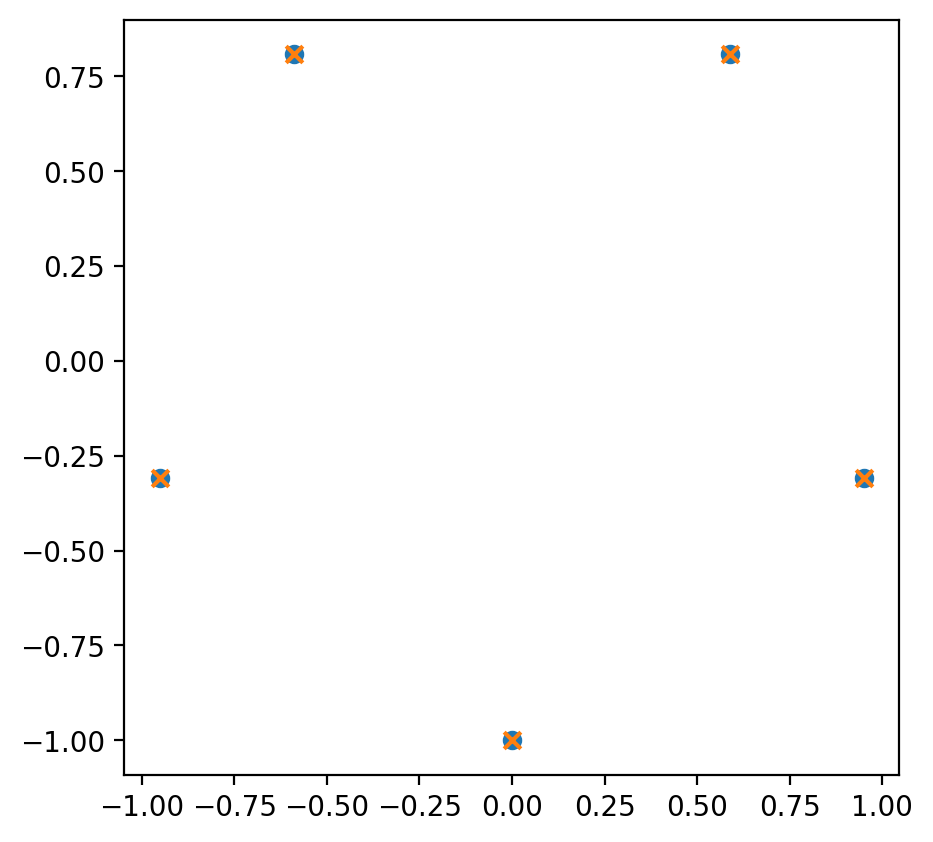

In [93]:
plt.figure(figsize=(11, 5), dpi = 100)
plt.subplot(1, 2, 1)
plt.scatter([p.real for p in points], [p.imag for p in points], label = 'True')
plt.scatter(positions.real, positions.imag, marker = 'x')